# THE SPARK FOUNDATION


### Data Science and Business Analytics Internship
### By : AKASH KESRWANI
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
### Prediction using Unsupervised ML
### Task 2 : K-means Clustering
Problem Statement: Predict the optimum number of clusters and represent it visually

# Importing libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings("ignore")


## Read data

In [4]:
data=pd.read_csv(r'Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Data Type and Dimensions

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
#cheking the dimensions of dataset
data.shape

(150, 6)

In [7]:
#Performing describe() function to understand the satatistical summary
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
#checking the missing values in the dataset
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Distributions of variables

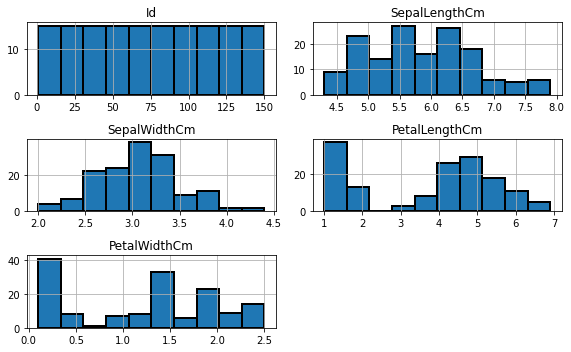

In [10]:
data.hist(edgecolor='Black', linewidth=2, figsize=(8,5));
plt.tight_layout()

In [14]:
data.kurt()

Id              -1.200000
SepalLengthCm   -0.552064
SepalWidthCm     0.290781
PetalLengthCm   -1.401921
PetalWidthCm    -1.339754
dtype: float64

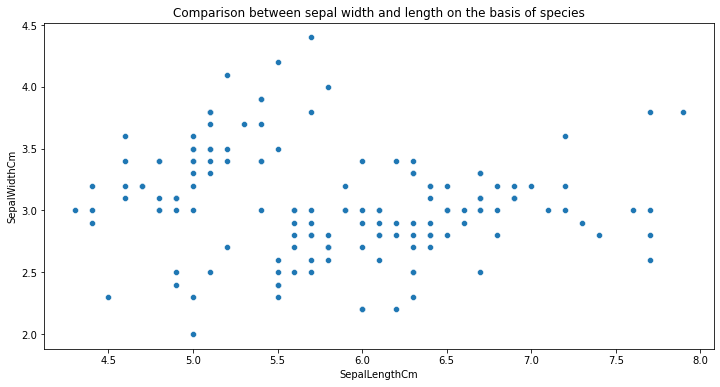

In [15]:
plt.figure(figsize=(12,6))
plt.title('Comparison between sepal width and length on the basis of species')
sns.scatterplot(data['SepalLengthCm'], data['SepalWidthCm']);


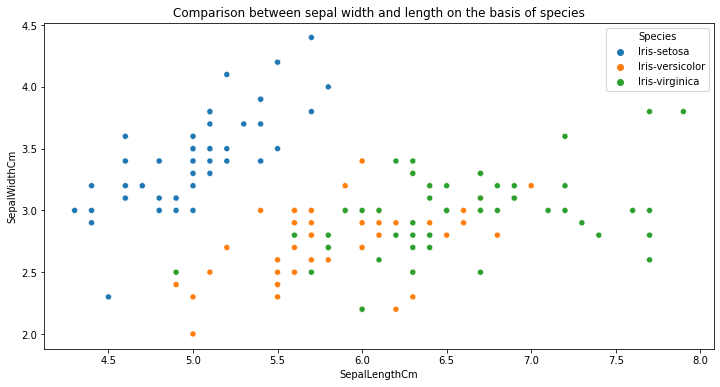

In [17]:
plt.figure(figsize=(12,6))
plt.title('Comparison between sepal width and length on the basis of species')
sns.scatterplot(data['SepalLengthCm'], data['SepalWidthCm'], hue = data['Species']);

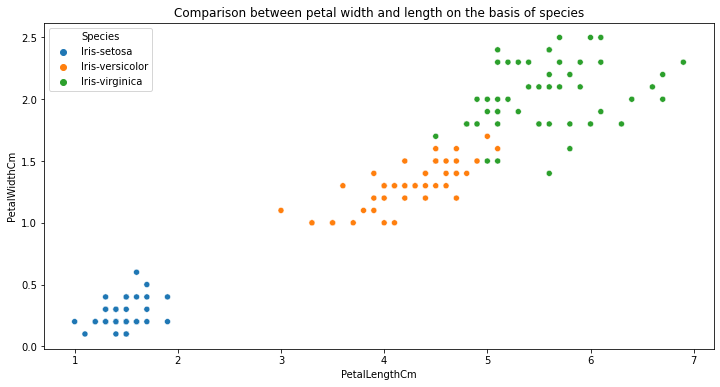

In [18]:
plt.figure(figsize=(12,6))
plt.title('Comparison between petal width and length on the basis of species')
sns.scatterplot(data['PetalLengthCm'], data['PetalWidthCm'], hue = data['Species']);


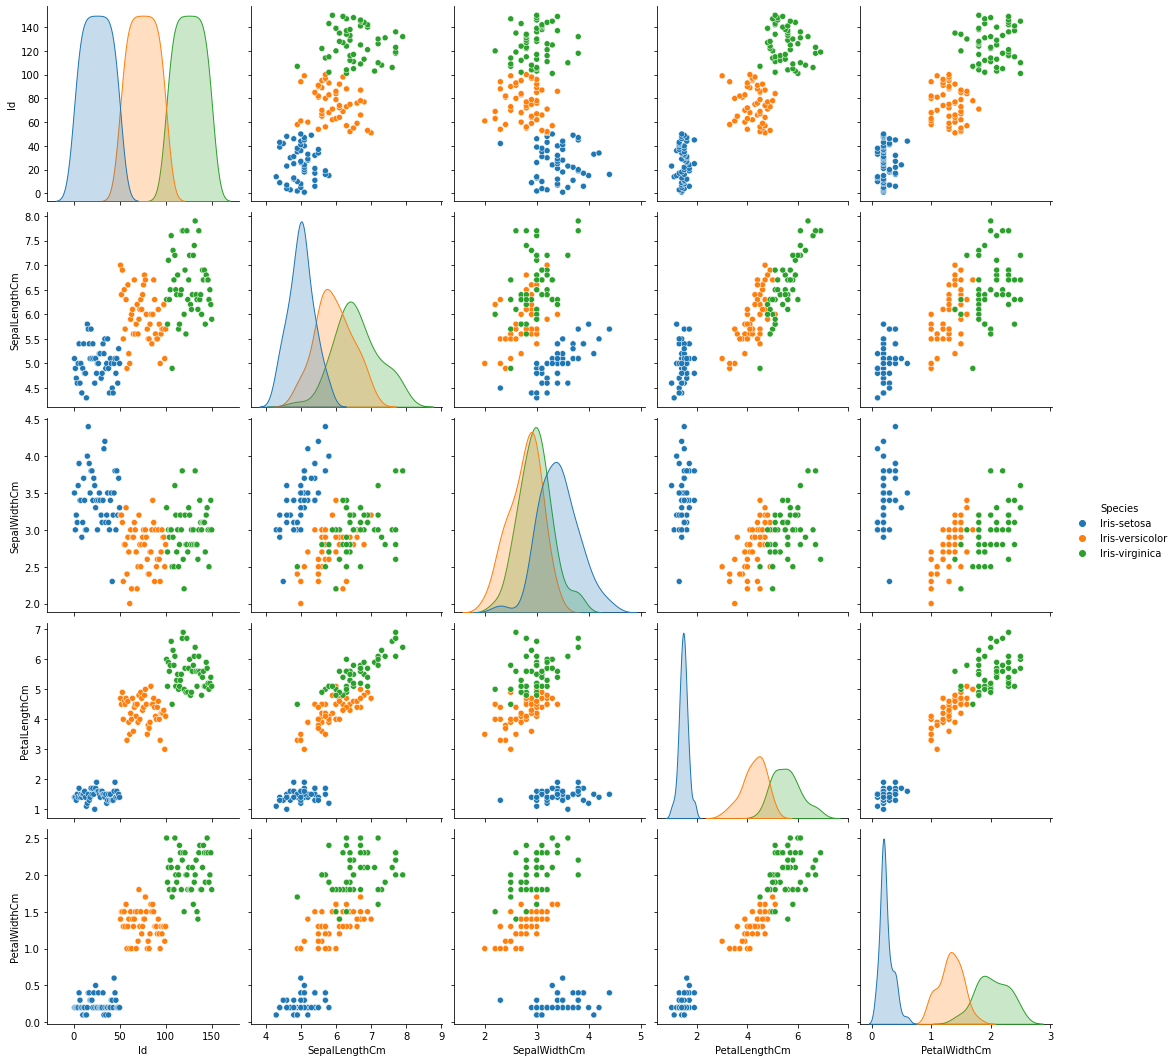

In [28]:
sns.pairplot(data,hue="Species",height=3);

In [20]:
data.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


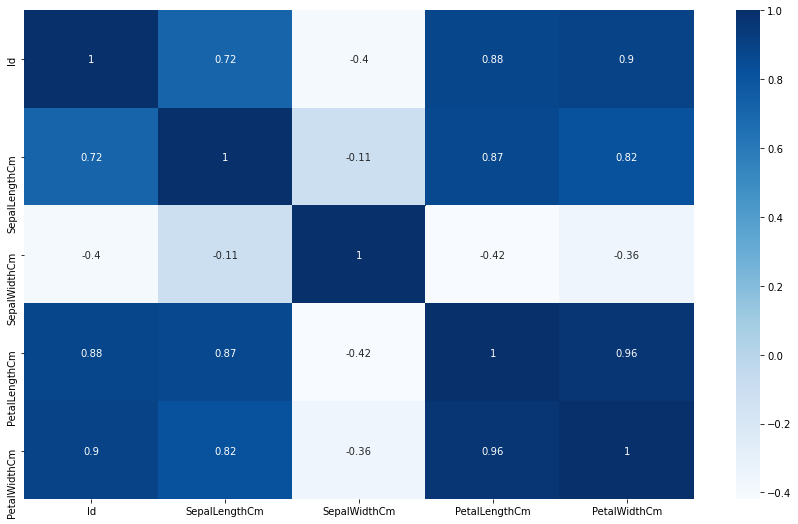

In [21]:
fig = plt.figure(figsize = (15,9))
sns.heatmap(data.corr(), cmap='Blues', annot = True);


In [29]:
X=data.iloc[:,0:-1].values
Y=data["Species"].map({"Iris-setosa":0,"Iris-versicolor":1,"Iris-virginica":2 })

In [23]:
X

array([[1.00e+00, 5.10e+00, 3.50e+00, 1.40e+00, 2.00e-01],
       [2.00e+00, 4.90e+00, 3.00e+00, 1.40e+00, 2.00e-01],
       [3.00e+00, 4.70e+00, 3.20e+00, 1.30e+00, 2.00e-01],
       [4.00e+00, 4.60e+00, 3.10e+00, 1.50e+00, 2.00e-01],
       [5.00e+00, 5.00e+00, 3.60e+00, 1.40e+00, 2.00e-01],
       [6.00e+00, 5.40e+00, 3.90e+00, 1.70e+00, 4.00e-01],
       [7.00e+00, 4.60e+00, 3.40e+00, 1.40e+00, 3.00e-01],
       [8.00e+00, 5.00e+00, 3.40e+00, 1.50e+00, 2.00e-01],
       [9.00e+00, 4.40e+00, 2.90e+00, 1.40e+00, 2.00e-01],
       [1.00e+01, 4.90e+00, 3.10e+00, 1.50e+00, 1.00e-01],
       [1.10e+01, 5.40e+00, 3.70e+00, 1.50e+00, 2.00e-01],
       [1.20e+01, 4.80e+00, 3.40e+00, 1.60e+00, 2.00e-01],
       [1.30e+01, 4.80e+00, 3.00e+00, 1.40e+00, 1.00e-01],
       [1.40e+01, 4.30e+00, 3.00e+00, 1.10e+00, 1.00e-01],
       [1.50e+01, 5.80e+00, 4.00e+00, 1.20e+00, 2.00e-01],
       [1.60e+01, 5.70e+00, 4.40e+00, 1.50e+00, 4.00e-01],
       [1.70e+01, 5.40e+00, 3.90e+00, 1.30e+00, 4.00e-01

In [30]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

# K-means Clustering

Text(0.5, 1.0, 'Elbow curve')

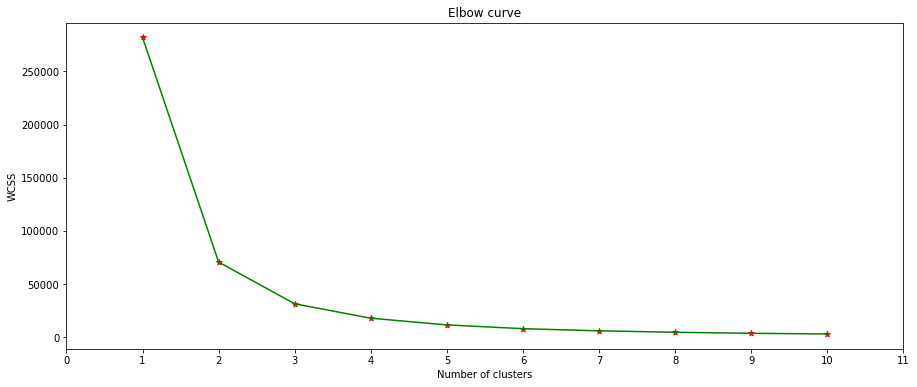

In [38]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans

wsse = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wsse.append(kmeans.inertia_)

 #plotting elbow curve   
plt.figure(figsize=(15,6)) #Ploting Elbow Method
plt.scatter(range(1, 11), wsse,marker="*",c="red")       
plt.plot(range(1, 11), wsse,c="green")
plt.xlabel("Number of clusters")           
plt.ylabel("WCSS")
plt.xticks(range(0,12,1)) #for value of k from 0 to 11 in graph
plt.title("Elbow curve") 


### In the above graph, there is no bend after the 3rd cluster, hence, 3 is the optimum number of clusters, i.e, k=3

In [39]:
k_means = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0, 
               precompute_distances = 'auto', tol = 0.0001, verbose = 0)
Y_pred = k_means.fit_predict(X)

Text(0.5, 1.0, 'Predicted')

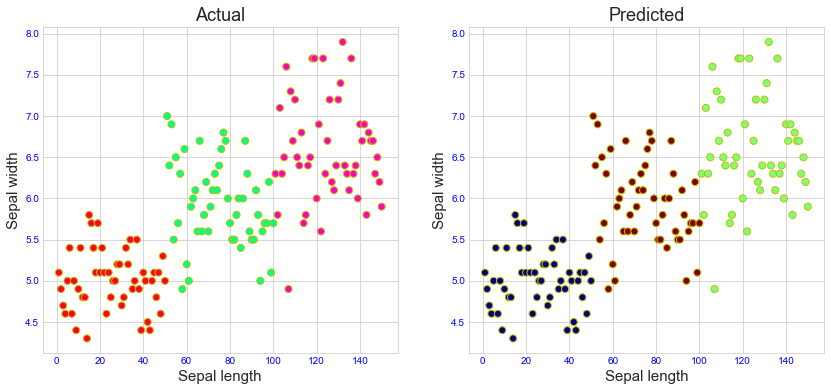

In [47]:
new_labels = k_means.labels_
# Plot the identified clusters and compare with the answers
sns.set_style("whitegrid");
fig, axes = plt.subplots(1, 2, figsize=(14,6))
axes[0].scatter(X[:, 0], X[:, 1], c=Y, cmap='gist_rainbow', edgecolor='y', s=50)
axes[1].scatter(X[:, 0], X[:, 1], c=new_labels, cmap='jet', edgecolor='y', s=50)
axes[0].set_xlabel('Sepal length', fontsize=15)
axes[0].set_ylabel('Sepal width', fontsize=15)
axes[1].set_xlabel('Sepal length', fontsize=15)
axes[1].set_ylabel('Sepal width', fontsize=15)
axes[0].tick_params(direction='in', length=10, width=5, colors='b', labelsize=10)
axes[1].tick_params(direction='in', length=10, width=5, colors='b', labelsize=10)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

In [49]:
KModel = k_means.fit(X)
KModel

KMeans(n_clusters=3, precompute_distances='auto', random_state=0)

### Finding out cluster center 

In [50]:
KModel.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

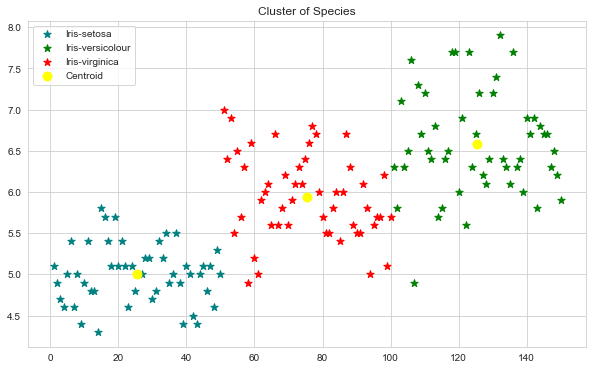

In [54]:
sns.set_style("whitegrid");
plt.figure(figsize=(10,6))
plt.scatter(X[Y_pred==0,0], X[Y_pred==0,1],s = 60,c = 'teal', label = 'Iris-setosa' ,marker="*")
plt.scatter(X[Y_pred==1,0], X[Y_pred==1,1],s = 60,c = 'green', label = 'Iris-versicolour' ,marker="*")
plt.scatter(X[Y_pred==2,0], X[Y_pred==2,1],s = 60,c = 'red', label = 'Iris-virginica' ,marker="*")
plt.scatter(k_means.cluster_centers_[:,0], k_means.cluster_centers_[:,1], s = 80, c = 'yellow', label = 'Centroid')
plt.title("Cluster of Species")
plt.legend()
plt.show()


--------------------------------------------------------------------------------------------------------------------------------
# THANK YOU!!!